# Visualização de dados

Gráficos básicos em python fazendo algumas visualizações sobre mulheres na Ciência de Dados no Brasil


In [50]:
# Importando bibliotecas

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [51]:
# Carregando a base de dados

df = pd.read_csv('dataset.csv')

In [52]:
df.head()

,Unnamed: 0,Idade,Genero,UF,Regiao_origem,Nivel Ensino,Area Formacao,Situacao Trabalho,Setor,Trabalha como Gestao,...,Cargo Atual,Nivel,Faixa Salarial,Insatisfacao com a Empresa,Tempo XP em Dados,Tempo XP em Software,Criterios de escolha trabalho,Forma de trabalho atual,Forma de trabalho desejada,Faixa Salarial_number
0,0,38.0,Masculino,CE,NaN,Pós-graduação,Química / Física,Empregado (CLT),Marketing,1.0,...,NaN,Gestor,de R$ 4.001/mês a R$ 6.000/mês,NaN,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,6000.0
1,1,39.0,Masculino,BA,Sudeste,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),Consultoria,1.0,...,NaN,Gestor,de R$ 6.001/mês a R$ 8.000/mês,NaN,de 2 a 3 anos,Não tive experiência na área de TI/Engenharia ...,Flexibilidade de trabalho remoto,Modelo híbrido flexível (o funcionário tem lib...,Modelo 100% remoto,8000.0
2,2,30.0,Masculino,SC,NaN,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Indústria,1.0,...,NaN,Gestor,de R$ 8.001/mês a R$ 12.000/mês,O clima de trabalho/ambiente não é bom,de 1 a 2 anos,de 2 a 3 anos,Oportunidade de aprendizado e trabalhar com re...,Modelo 100% presencial,Modelo 100% remoto,12000.0
3,3,38.0,Feminino,SP,NaN,Pós-graduação,Outras,Empreendedor ou Empregado (CNPJ),Serviços,1.0,...,NaN,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Falta de maturidade analítica na empresa,Mais de 10 anos,Menos de 1 ano,"Propósito do trabalho e da empresa, Flexibilid...",Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,16000.0
4,4,36.0,Masculino,SC,NaN,Pós-graduação,Outras Engenharias,Empreendedor ou Empregado (CNPJ),Varejo,1.0,...,NaN,Gestor,de R$ 8.001/mês a R$ 12.000/mês,Gostaria de trabalhar em em outra área de atua...,de 1 a 2 anos,de 4 a 5 anos,Maturidade da empresa em termos de tecnologia ...,Modelo 100% presencial,Modelo 100% remoto,12000.0


In [53]:
df.shape

(2365, 21)

## Definição da Visualização

O que é desejado observar:
- **Mulheres ganham menos que homens?**

## EDA 


### 1. Distribuição de mulheres e homens no dataset

In [54]:
df['Genero'].value_counts()

Masculino    1924
Feminino      436
Outro           5
Name: Genero, dtype: int64

Text(0.5, 1.0, 'Distribuição de Gênero na Área de Dados')

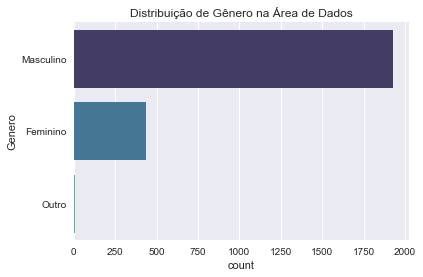

In [55]:
sns.countplot(y = "Genero", data = df, palette = "mako", order = df['Genero'].value_counts().index) \
.set_title("Distribuição de Gênero na Área de Dados")

### 2. Distribuição de cargos

In [56]:
df['Cargo Atual'].value_counts()

Cientista de Dados/Data Scientist                          357
Analista de BI/BI Analyst/Analytics Engineer               338
Analista de Dados/Data Analyst                             324
Engenheiro de Dados/Data Engineer                          300
Outro                                                      113
Analista de Negócios/Business Analyst                       96
Desenvolvedor ou Engenheiro de Software                     92
Engenheiro de Machine Learning/ML Engineer                  48
Outras Engenharias (não inclui dev)                         33
Estatístico                                                 25
Analista Administrativo                                     18
Analista de Inteligência de Mercado/Market Intelligence     18
Analista de Marketing                                       14
DBA/Administrador de Banco de Dados                         14
Analista de Sistemas/Analista de TI                         14
Técnico                                                

Text(0.5, 1.0, 'Distribuição de Cargos na Área de Dados')

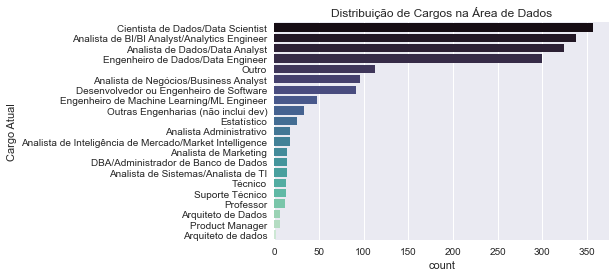

In [57]:
sns.countplot(y = "Cargo Atual", data = df, palette = "mako", order = df['Cargo Atual'].value_counts().index) \
.set_title("Distribuição de Cargos na Área de Dados")

### Analisando a distribuição de nível por gênero:


In [58]:
tmp = df.groupby('Genero')['Nivel'].value_counts()
tmp.head()

Genero     Nivel 
Feminino   Júnior    144
           Pleno     131
           Sênior     94
           Gestor     67
Masculino  Pleno     525
Name: Nivel, dtype: int64

In [59]:
tmp = tmp.reset_index(name='Total')
tmp.head()

,Genero,Nivel,Total
0,Feminino,Júnior,144
1,Feminino,Pleno,131
2,Feminino,Sênior,94
3,Feminino,Gestor,67
4,Masculino,Pleno,525


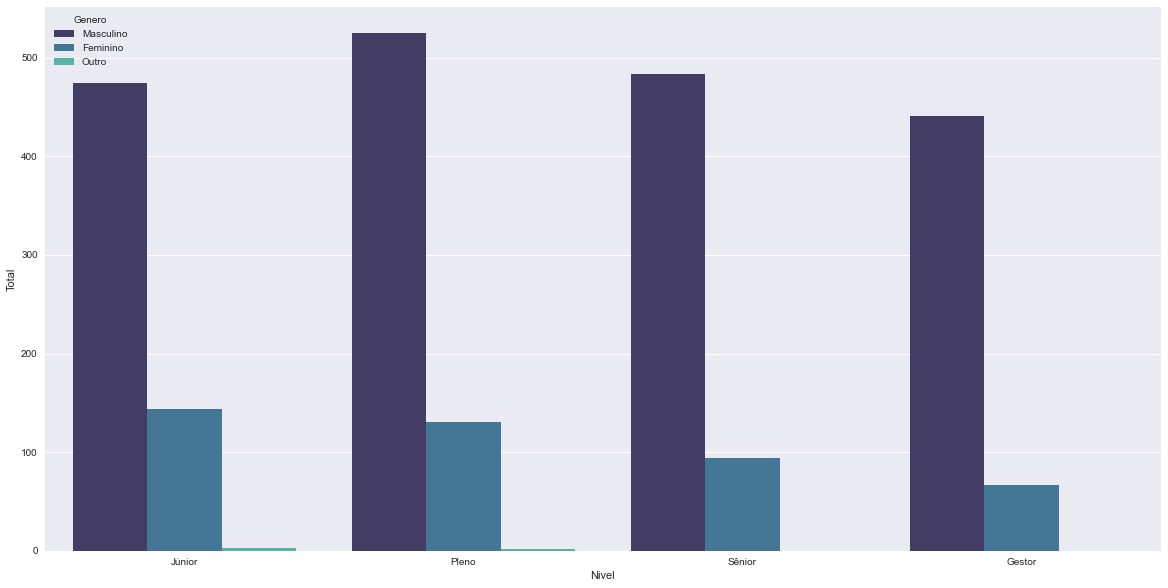

In [60]:
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel', y='Total', hue='Genero', data=tmp, hue_order=['Masculino', 'Feminino', 'Outro'], palette='mako');

### Analisando os salários

Analisando a distribuição geral dos salários

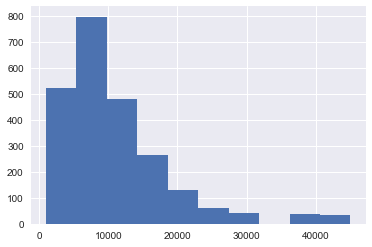

In [61]:
df['Faixa Salarial_number'].hist();

## Gênero vs Salário

Observando a diferença de salários entre gêneros com cargos de cientistas de dados separados por nível

In [62]:
df2 = df[df['Cargo Atual'].str.contains('Cientista de Dados', na=False)]

In [63]:
tmp = df2.groupby(['Genero', 'Nivel'])['Faixa Salarial_number'].mean()

In [64]:
tmp.head()

Genero     Nivel 
Feminino   Júnior     5615.384615
           Pleno      9600.000000
           Sênior    13882.352941
Masculino  Júnior     5247.191011
           Pleno     10896.825397
Name: Faixa Salarial_number, dtype: float64

In [65]:
tmp = tmp.reset_index(name='Salario Medio')
tmp.head()

,Genero,Nivel,Salario Medio
0,Feminino,Júnior,5615.384615
1,Feminino,Pleno,9600.000000
2,Feminino,Sênior,13882.352941
3,Masculino,Júnior,5247.191011
4,Masculino,Pleno,10896.825397


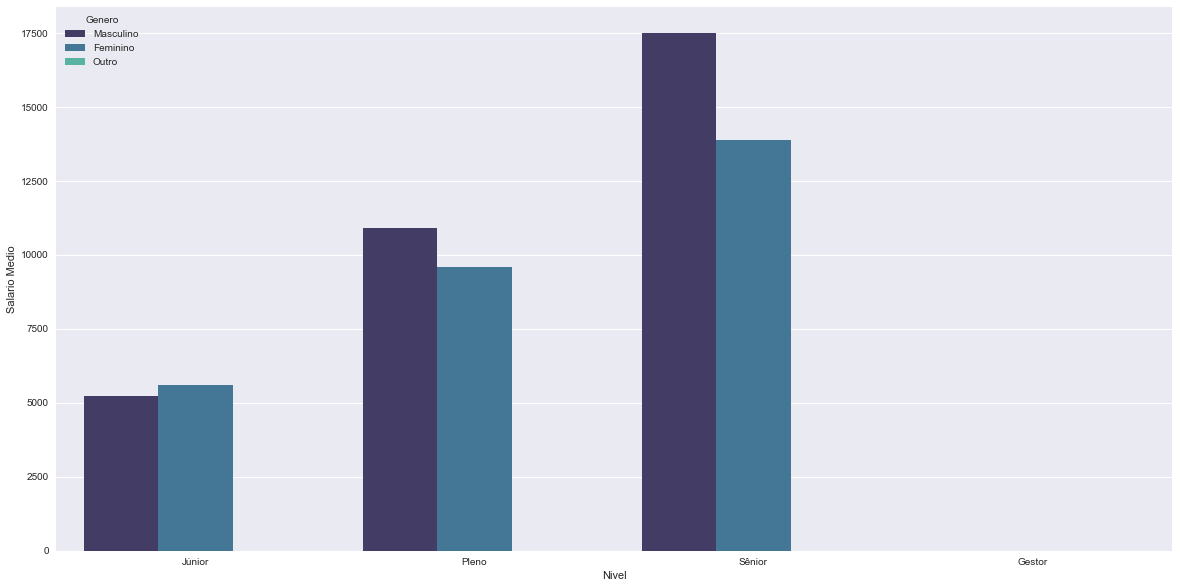

In [66]:
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel', y='Salario Medio', hue='Genero', data=tmp, order=['Júnior', 'Pleno', 'Sênior', 'Gestor'], palette='mako', hue_order=['Masculino', 'Feminino', 'Outro']);

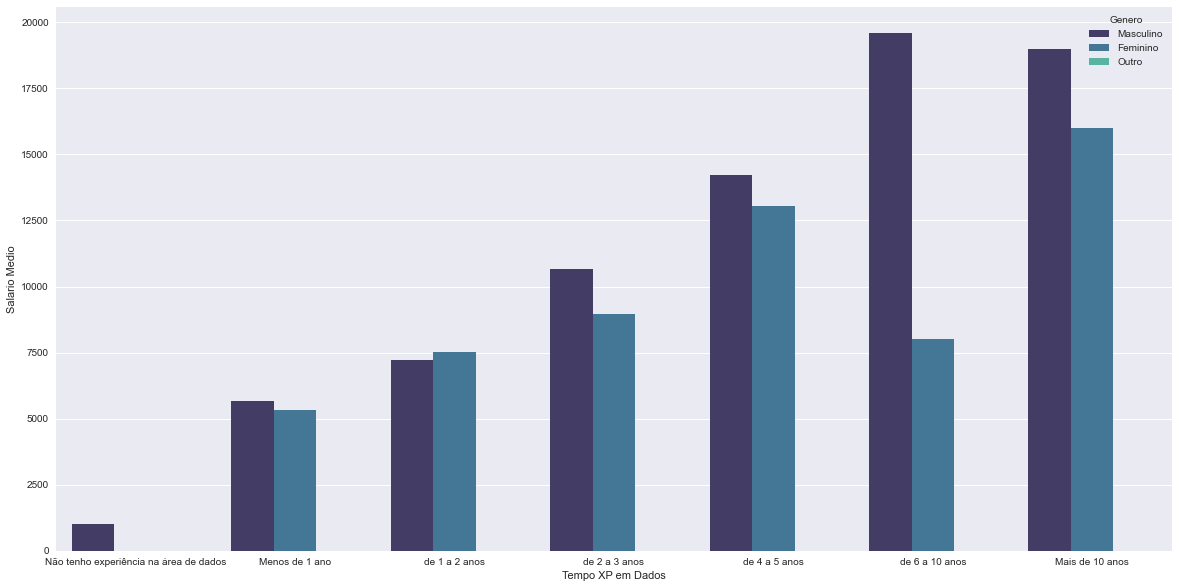

In [67]:
# Vendo por tempo de experiência

tmp = df2.groupby(['Genero', 'Tempo XP em Dados'])['Faixa Salarial_number'].mean()
tmp = tmp.reset_index(name='Salario Medio')
plt.figure(figsize=(20,10))
sns.barplot(x='Tempo XP em Dados', y='Salario Medio', hue='Genero', data=tmp, order=['Não tenho experiência na área de dados','Menos de 1 ano', 'de 1 a 2 anos',
       'de 2 a 3 anos', 'de 4 a 5 anos', 'de 6 a 10 anos', 'Mais de 10 anos'],
            hue_order=['Masculino', 'Feminino', 'Outro'], palette='mako');

## Gênero vs Cargo como Gestor(a)

In [68]:
genero_cargo_como_gestor = df.groupby(['Genero', 'Cargo como Gestor(a)'])['Faixa Salarial_number'].mean().reset_index(name='Salario Médio')

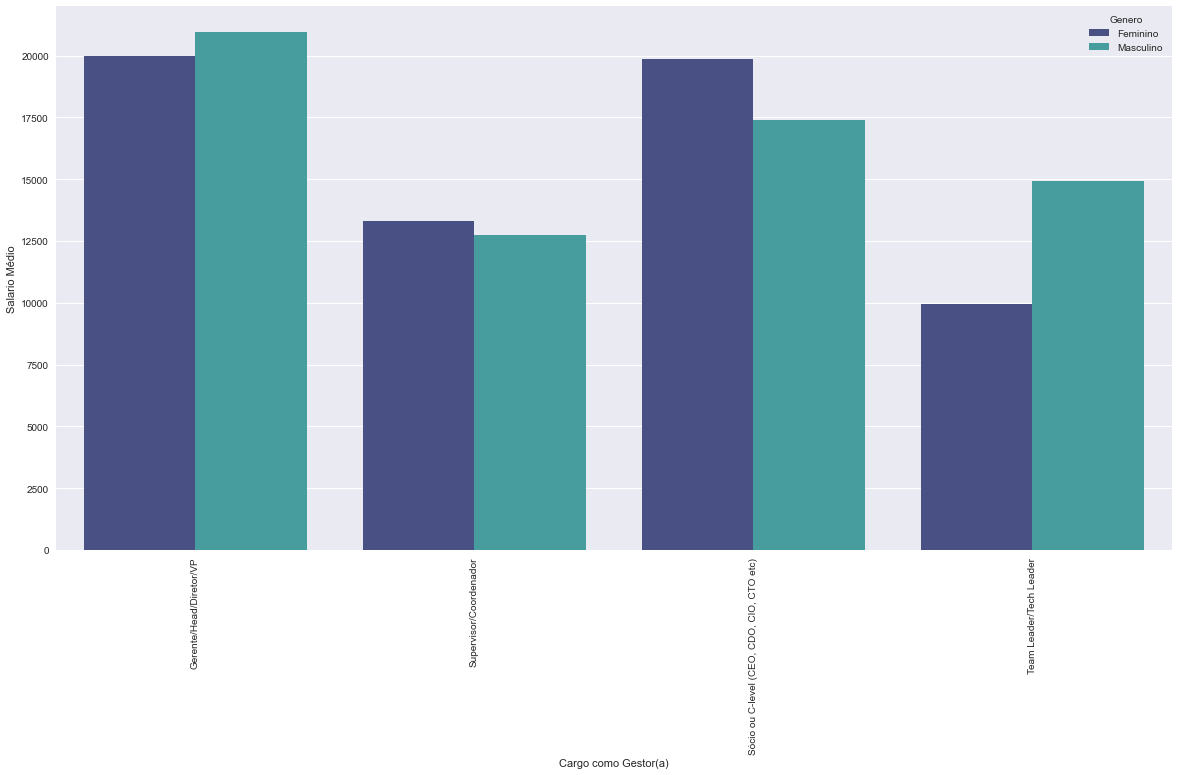

In [69]:
plt.figure(figsize=(20,10))
a = sns.barplot(data=genero_cargo_como_gestor, x='Cargo como Gestor(a)', y='Salario Médio', hue='Genero', palette='mako')
a = a.set_xticklabels(a.get_xticklabels(), rotation=90)

## Gênero vs Nível Ensino

In [70]:
genero_nivel_ensino = df.groupby(['Genero', 'Nivel Ensino'])['Faixa Salarial_number'].mean()
genero_nivel_ensino = genero_nivel_ensino.reset_index(name='Salario Médio')

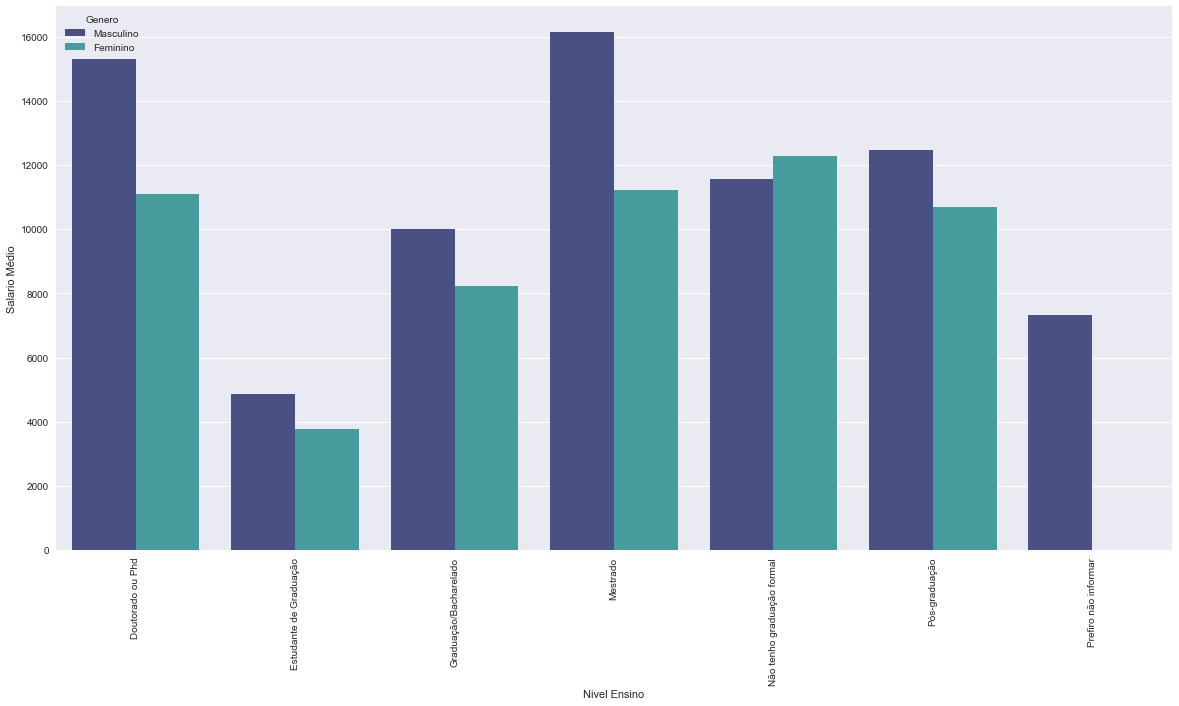

In [71]:
plt.figure(figsize=(20,10))
b = sns.barplot( data=genero_nivel_ensino, x='Nivel Ensino', y='Salario Médio', hue='Genero', hue_order=['Masculino', 'Feminino'], palette='mako')
b.set_xticklabels(b.get_xticklabels(), rotation=90);

## Gênero vs Área Formação

In [72]:
genero_area_formacao = df.groupby(['Genero', 'Area Formacao'])['Faixa Salarial_number'].mean()
genero_area_formacao = genero_area_formacao.reset_index(name='Salario Médio')

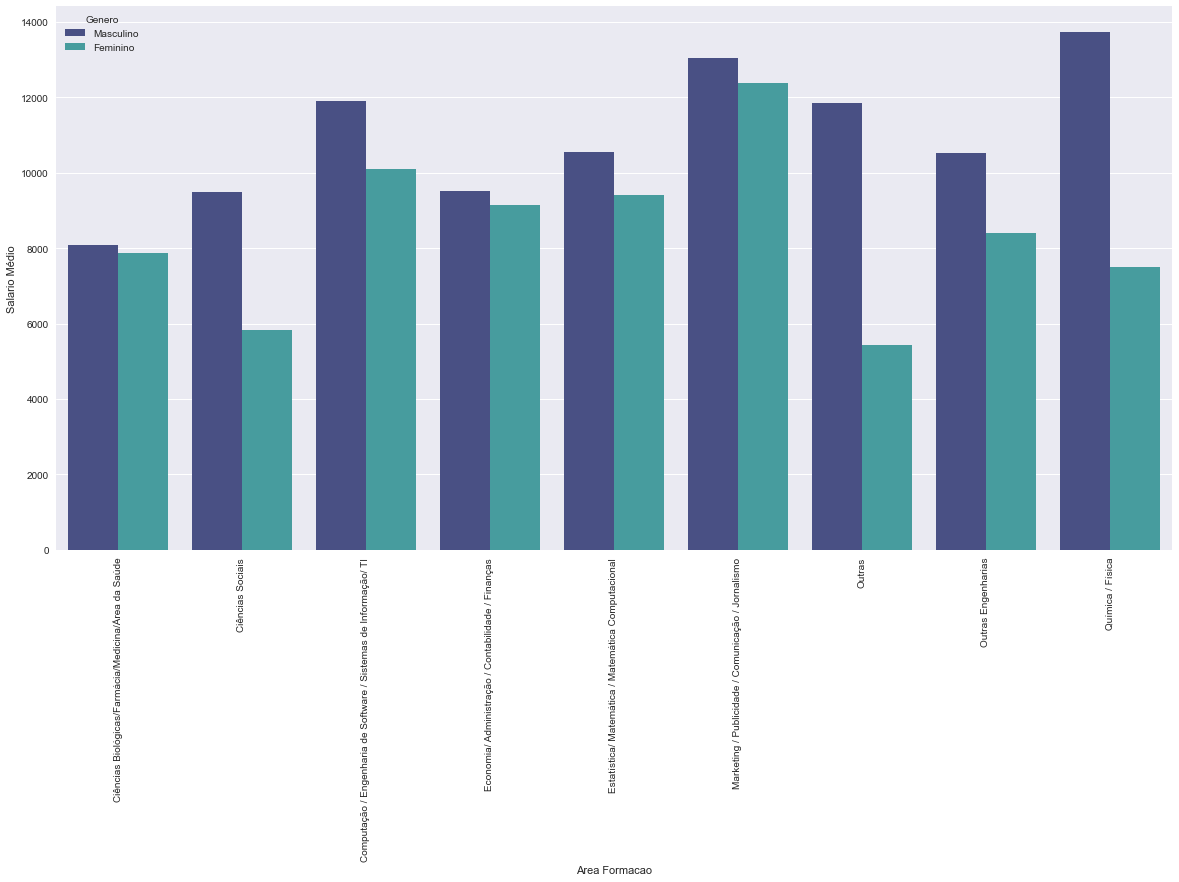

In [73]:
plt.figure(figsize=(20,10))
c = sns.barplot( data=genero_area_formacao, x='Area Formacao', y='Salario Médio', hue='Genero', hue_order=['Masculino', 'Feminino'], palette='mako')
c.set_xticklabels(c.get_xticklabels(), rotation=90);